In [1]:
import os
os.chdir("../")

In [2]:
from comchoice.aggregate import borda, plurality, copeland, minimax, k_approval, irv, divisiveness, coombs, schulze, tideman, dodgson_quick, dowdall, nanson, bradley_terry

import seaborn as sns
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
df = pd.read_csv("test/france_1st_round_pseudo_voter_data.csv")
df.head()

,department_id,voter,rank
0,01,Ambléon-0001,Emmanuel MACRON>Marine LE PEN>Jean-Luc MÉLENCH...
1,01,Ambronay-0001,Marine LE PEN>Emmanuel MACRON>Jean-Luc MÉLENCH...
2,01,Ambronay-0002,Marine LE PEN>Emmanuel MACRON>Jean-Luc MÉLENCH...
3,01,Ambutrix-0001,Marine LE PEN>Emmanuel MACRON>Jean-Luc MÉLENCH...
4,01,Ambérieu-en-Bugey-0001,Marine LE PEN>Jean-Luc MÉLENCHON>Emmanuel MACR...


In [4]:
# Department
gdf = gpd.read_file("https://github.com/gregoiredavid/france-geojson/raw/master/departements.geojson")
gdf.head()

,code,nom,geometry
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ..."
1,02,Aisne,"POLYGON ((3.17296 50.01131, 3.17382 50.01186, ..."
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.03424 46.79080, ..."
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.67817 44.19051, ..."
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.26417 45.12641, ..."


In [5]:
tideman(df)

,candidate,value,rank
0,Emmanuel MACRON,0,1
1,Marine LE PEN,1348,2
2,Jean-Luc MÉLENCHON,64248,3
5,Éric ZEMMOUR,215840,4
3,Valérie PÉCRESSE,256112,5
8,Yannick JADOT,286700,6
7,Jean LASSALLE,296962,7
4,Fabien ROUSSEL,396786,8
9,Nicolas DUPONT-AIGNAN,426468,9
6,Anne HIDALGO,477028,10


In [6]:
output = []

for code, tmp in df.groupby("department_id"):
    print(code)
    for method, rank in [
        ("Borda", borda(tmp)),
        ("Dowdall", dowdall(tmp)),
        ("Plurality", plurality(tmp)),
        ("Copeland", copeland(tmp)),
        ("Nanson", nanson(tmp)),
        ("Schulze", schulze(tmp)),
        ("Tideman", tideman(tmp)),
        ("Dodgson Quick", dodgson_quick(tmp)),
        ("Minimax (Winning votes)", minimax(tmp)),
        ("Minimax (Margins)", minimax(tmp, method="margins")),
        ("k-Approval (k=2)", k_approval(tmp, k=2)),
        ("IRV", irv(tmp))
    ]:
        rank["code"] = code
        rank["method"] = method
        output.append(rank)

01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
21
22
23
24
25
26
27
28
29
2A
2B
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
ZA
ZB
ZC
ZD
ZM
ZN
ZP
ZS
ZW
ZX
ZZ


In [7]:
df_rank = pd.concat(output).fillna(1)
df_rank

,candidate,value,rank,code,method
5,Marine LE PEN,6039.000000,1.0,01,Borda
1,Emmanuel MACRON,6032.000000,2.0,01,Borda
4,Jean-Luc MÉLENCHON,5387.000000,3.0,01,Borda
11,Éric ZEMMOUR,4480.000000,4.0,01,Borda
9,Valérie PÉCRESSE,3673.000000,5.0,01,Borda
...,...,...,...,...,...
3,Jean LASSALLE,0.000000,8.0,ZZ,k-Approval (k=2)
6,Nathalie ARTHAUD,0.000000,8.0,ZZ,k-Approval (k=2)
7,Nicolas DUPONT-AIGNAN,0.000000,8.0,ZZ,k-Approval (k=2)
8,Philippe POUTOU,0.000000,8.0,ZZ,k-Approval (k=2)


In [31]:
df_rank.groupby(["candidate"]).agg({"rank": "std"}).sort_values("rank")

,rank
candidate,
Emmanuel MACRON,0.624888
Jean-Luc MÉLENCHON,0.716392
Marine LE PEN,0.893208
Éric ZEMMOUR,1.032008
Valérie PÉCRESSE,1.180533
Yannick JADOT,1.500682
Jean LASSALLE,1.605565
Nicolas DUPONT-AIGNAN,1.654436
Fabien ROUSSEL,1.730370


In [8]:
data = pd.merge(gdf, df_rank[df_rank["rank"] == 1], on="code")
data["color"] = data["candidate"].replace({
    "Nathalie ARTHAUD": "#aa0201",
    "Fabien ROUSSEL": "#dd0200",
    "Emmanuel MACRON": "#ffd601",
    "Jean LASSALLE": "#adc0fd",
    "Marine LE PEN": "#014a76",
    "Éric ZEMMOUR": "#0b0a66",
    "Jean-Luc MÉLENCHON": "#c9462b",
    "Anne HIDALGO": "#ed1651",
    "Yannick JADOT": "#79b31e",
    "Valérie PÉCRESSE": "#0066cc",
    "Philippe POUTOU": "#c00b1e",
    "Nicolas DUPONT-AIGNAN": "#0587cc"
})

In [9]:
# data = data[~data["method"].isin(["Dodgson Quick", "Tideman"])]

In [18]:
data.group

,code,nom,geometry,candidate,value,rank,method,color
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ...",Marine LE PEN,6039.000000,1.0,Borda,#014a76
1,01,Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ...",Marine LE PEN,424.916667,1.0,Dowdall,#014a76
2,01,Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ...",Marine LE PEN,297.000000,1.0,Plurality,#014a76
3,01,Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ...",Marine LE PEN,1.000000,1.0,Copeland,#014a76
4,01,Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ...",Marine LE PEN,0.000000,1.0,Nanson,#014a76
...,...,...,...,...,...,...,...,...
1149,95,Val-d'Oise,"POLYGON ((2.59052 49.07965, 2.59013 49.07786, ...",Jean-Luc MÉLENCHON,0.000000,1.0,Dodgson Quick,#c9462b
1150,95,Val-d'Oise,"POLYGON ((2.59052 49.07965, 2.59013 49.07786, ...",Jean-Luc MÉLENCHON,0.000000,1.0,Minimax (Winning votes),#c9462b
1151,95,Val-d'Oise,"POLYGON ((2.59052 49.07965, 2.59013 49.07786, ...",Jean-Luc MÉLENCHON,-0.062885,1.0,Minimax (Margins),#c9462b
1152,95,Val-d'Oise,"POLYGON ((2.59052 49.07965, 2.59013 49.07786, ...",Emmanuel MACRON,721.000000,1.0,k-Approval (k=2),#ffd601


/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only speci

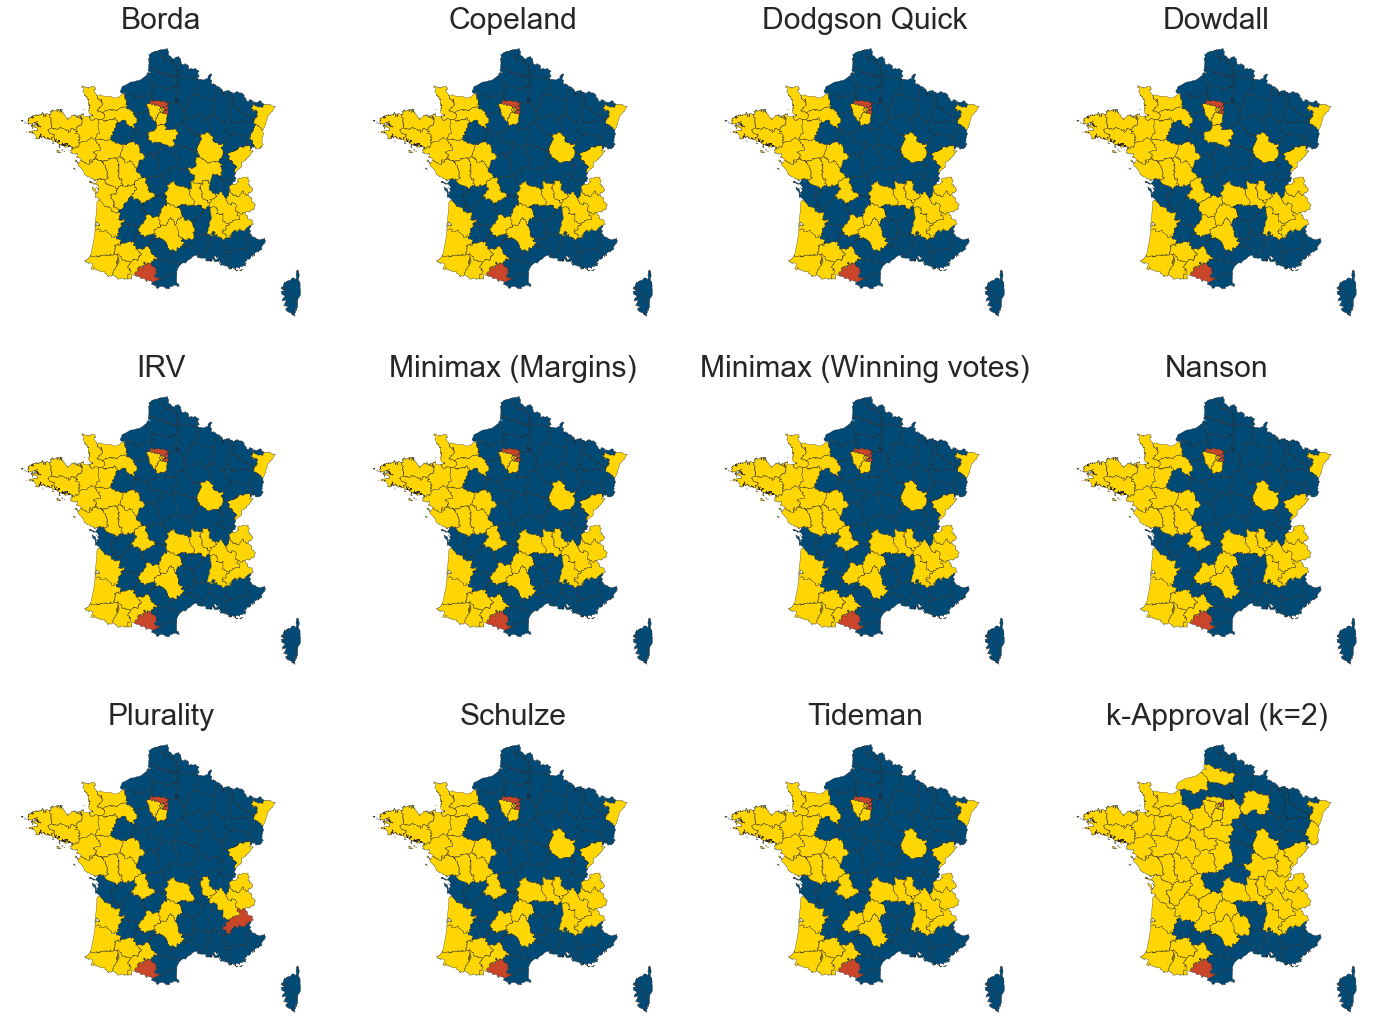

In [10]:
sns.set(font_scale=2.5)
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

i = 0
for method, tmp in data.groupby("method"):
    x = i // 4
    y = i % 4
    ax = axs[x][y]
    tmp.plot(
        ax=ax, edgecolor="#222222", linewidth=0.3, color=tmp["color"], 
        column="candidate", legend=True,
        legend_kwds={"loc": "upper right", "bbox_to_anchor": (1, 0.5)})
    
    ax.axis("off")
    ax.set_title(method)
    
    i += 1
    
fig.tight_layout()

In [11]:
# import numpy as np
# import pandas as pd
# from tqdm import tqdm

# from comchoice.aggregate import ahp
# from comchoice.aggregate.__set_card_id import __set_card_id
# from comchoice.aggregate.__set_rank import __set_rank
# from comchoice.preprocessing import to_pairwise


# def divisiveness(
#     df,
#     candidate="candidate",
#     method=ahp,
#     alternative_a="alternative_a",
#     alternative_b="alternative_b",
#     selected="selected",
#     convert_pairwise=False,
#     show_rank=True,
#     verbose=True,
#     voter="voter"
# ):
#     """Divisiveness

#     Parameters
#     ----------
#     df : _type_
#         _description_
#     candidate : str, optional
#         _description_, by default "id"
#     method : _type_, optional
#         _description_, by default borda
#     alternative_a : str, optional
#         _description_, by default "alternative_a"
#     alternative_b : str, optional
#         _description_, by default "alternative_b"
#     selected : str, optional
#         _description_, by default "selected"
#     verbose : bool, optional
#         _description_, by default True
#     voter : str, optional
#         _description_, by default "voter"

#     Returns
#     -------
#     _type_
#         _description_
#     """
#     tmp = df.copy()
#     df_original = df.copy()
#     if convert_pairwise:
#         tmp = to_pairwise(tmp, origin="voting")

#     tmp = __set_card_id(
#         tmp,
#         alternative_a=alternative_a,
#         alternative_b=alternative_b,
#         selected=selected,
#         concat="_"
#     )

#     dd = tmp.groupby(["card_id", selected, voter]).agg({"id": "count"})
#     # _data = df.copy().set_index(voter)

#     def _f(idx, df_select):
#         card_id = idx[0]
#         s = idx[1]
#         users = [item[2] for item in df_select.index.to_numpy()]

#         # data_temp = _data.loc[users].reset_index()
#         data_temp = df_original[df_original[voter].isin(users)]
                
#         r_tmp = method(data_temp).dropna()
#         r_tmp["card_id"] = card_id
#         r_tmp[selected] = s

#         del data_temp, users

#         return r_tmp

#     tmp_list = []

#     _data_tmp = dd.groupby(level=[0, 1])

#     _iter = tqdm(_data_tmp, position=0,
#                  leave=True) if verbose else _data_tmp

#     for idx, df_select in _iter:
#         tmp_list.append(_f(idx, df_select))

#     tmp = pd.concat(tmp_list, ignore_index=True)

#     tmp[[f"{alternative_a}_sorted", f"{alternative_b}_sorted"]
#         ] = tmp["card_id"].str.split("_", expand=True)
#     tmp["group"] = tmp[f"{alternative_a}_sorted"].astype(
#         str) == tmp[selected].astype(str)
#     tmp["group"] = tmp["group"].replace({True: "A", False: "B"})

#     tmp_a = tmp[tmp["group"] == "A"]
#     tmp_b = tmp[tmp["group"] == "B"]

#     tmp_dv = pd.merge(tmp_a, tmp_b, on=[
#                       "card_id", candidate, f"{alternative_a}_sorted", f"{alternative_b}_sorted"])

#     tmp_dv = tmp_dv[[candidate, "card_id", "value_x",
#                      "value_y", f"{selected}_x", f"{selected}_y"]]
    
#     tmp_dv["value"] = tmp_dv["value_x"] - tmp_dv["value_y"]
#     tmp_dv["value"] = tmp_dv["value"] ** 2
#     tmp_dv["value"] = np.sqrt(tmp_dv["value"])

#     tmp_frag_a = tmp_dv[[candidate, f"{selected}_x", "value"]].rename(
#         columns={f"{selected}_x": "selected"})
#     tmp_frag_b = tmp_dv[[candidate, f"{selected}_y", "value"]].rename(
#         columns={f"{selected}_y": "selected"})
#     tmp = pd.concat([tmp_frag_a, tmp_frag_b])
#     tmp = tmp[tmp[candidate]
#               == tmp["selected"]]
#     tmp = tmp.groupby(candidate).agg(
#         {"value": "mean"}).reset_index()

#     if show_rank:
#         tmp = __set_rank(tmp)

#     return tmp


In [12]:
# divisiveness(df[df["department_id"] == "31"], convert_pairwise=True, method=copeland)

In [13]:
output_dv = []

for code, tmp in df.groupby("department_id"):
    print(code)
    for method, rank in [
        ("Borda", divisiveness(tmp, convert_pairwise=True, method=borda)),
        ("Dowdall", divisiveness(tmp, convert_pairwise=True, method=dowdall)),
        ("Copeland", divisiveness(tmp, convert_pairwise=True, method=copeland)),
        ("Plurality", divisiveness(tmp, convert_pairwise=True, method=plurality)),
#         ("Nanson", divisiveness(tmp, convert_pairwise=True, method=nanson)),
#         ("Schulze", divisiveness(tmp, convert_pairwise=True, method=schulze)),
#         ("Tideman", divisiveness(tmp, convert_pairwise=True, method=tideman)),
#         ("Dodgson Quick", divisiveness(tmp, convert_pairwise=True, method=dodgson_quick)),
#         ("Minimax (Winning votes)", divisiveness(tmp, convert_pairwise=True, method=minimax)),
#         ("Minimax (Margins)", divisiveness(tmp, convert_pairwise=True, method=minimax)),
#         ("k-Approval (k=2)", divisiveness(tmp, convert_pairwise=True, method=k_approval)),
#         ("IRV", divisiveness(tmp, convert_pairwise=True, method=irv))
    ]:
        rank["code"] = code
        rank["method"] = method
        output_dv.append(rank)

01


100%|██████████| 118/118 [00:01<00:00, 66.35it/s]


02


100%|██████████| 122/122 [00:02<00:00, 57.07it/s]


03


100%|██████████| 117/117 [00:01<00:00, 71.33it/s]


04


100%|██████████| 123/123 [00:01<00:00, 82.09it/s]


05


100%|██████████| 126/126 [00:01<00:00, 80.73it/s]


06


100%|██████████| 124/124 [00:02<00:00, 44.30it/s]


07


100%|██████████| 122/122 [00:01<00:00, 76.07it/s]


08


100%|██████████| 124/124 [00:02<00:00, 60.62it/s]


09


100%|██████████| 128/128 [00:02<00:00, 51.71it/s]


10


100%|██████████| 126/126 [00:01<00:00, 73.25it/s]


11


100%|██████████| 129/129 [00:02<00:00, 56.55it/s]


12


100%|██████████| 117/117 [00:01<00:00, 60.32it/s]


13


100%|██████████| 112/112 [00:04<00:00, 25.00it/s]


14


100%|██████████| 124/124 [00:04<00:00, 28.58it/s]


15


100%|██████████| 118/118 [00:02<00:00, 43.60it/s]


16


100%|██████████| 119/119 [00:02<00:00, 57.82it/s]


17


100%|██████████| 120/120 [00:02<00:00, 55.52it/s]


18


100%|██████████| 119/119 [00:01<00:00, 72.23it/s]


19


100%|██████████| 124/124 [00:01<00:00, 68.09it/s]


21


100%|██████████| 130/130 [00:01<00:00, 65.92it/s]


22


100%|██████████| 117/117 [00:02<00:00, 52.68it/s]


23


100%|██████████| 117/117 [00:01<00:00, 68.32it/s]


24


100%|██████████| 120/120 [00:01<00:00, 72.66it/s]


25


100%|██████████| 128/128 [00:02<00:00, 55.96it/s]


26


100%|██████████| 128/128 [00:01<00:00, 71.61it/s]


27


100%|██████████| 118/118 [00:01<00:00, 60.89it/s]


28


100%|██████████| 119/119 [00:01<00:00, 65.43it/s]


29


100%|██████████| 112/112 [00:02<00:00, 50.16it/s]


2A


100%|██████████| 123/123 [00:01<00:00, 82.33it/s]


2B


100%|██████████| 130/130 [00:01<00:00, 66.60it/s]


30


100%|██████████| 123/123 [00:01<00:00, 65.16it/s]


31


100%|██████████| 125/125 [00:02<00:00, 51.04it/s]


32


100%|██████████| 124/124 [00:01<00:00, 73.99it/s]


33


100%|██████████| 118/118 [00:02<00:00, 48.71it/s]


34


100%|██████████| 122/122 [00:01<00:00, 64.19it/s]


35


100%|██████████| 113/113 [00:01<00:00, 63.24it/s]


36


100%|██████████| 117/117 [00:01<00:00, 78.38it/s]


37


100%|██████████| 119/119 [00:01<00:00, 76.52it/s]


38


100%|██████████| 123/123 [00:01<00:00, 63.77it/s]


39


100%|██████████| 127/127 [00:01<00:00, 77.31it/s]


40


100%|██████████| 115/115 [00:01<00:00, 74.15it/s]


41


100%|██████████| 123/123 [00:01<00:00, 81.76it/s]


42


100%|██████████| 120/120 [00:01<00:00, 70.42it/s]


43


100%|██████████| 124/124 [00:01<00:00, 76.25it/s]


44


100%|██████████| 118/118 [00:02<00:00, 58.92it/s]


45


100%|██████████| 118/118 [00:01<00:00, 59.33it/s]


46


100%|██████████| 119/119 [00:01<00:00, 73.85it/s]


47


100%|██████████| 117/117 [00:01<00:00, 72.78it/s]


48


100%|██████████| 125/125 [00:01<00:00, 80.60it/s]


49


100%|██████████| 117/117 [00:01<00:00, 67.79it/s]


50


100%|██████████| 121/121 [00:01<00:00, 69.60it/s]


51


100%|██████████| 126/126 [00:01<00:00, 65.63it/s]


52


100%|██████████| 130/130 [00:01<00:00, 74.52it/s]


53


100%|██████████| 115/115 [00:01<00:00, 79.43it/s]


54


100%|██████████| 127/127 [00:01<00:00, 63.69it/s]


55


100%|██████████| 128/128 [00:01<00:00, 74.82it/s]


56


100%|██████████| 114/114 [00:01<00:00, 65.71it/s]


57


100%|██████████| 123/123 [00:02<00:00, 57.70it/s]


58


100%|██████████| 122/122 [00:01<00:00, 73.22it/s]


59


100%|██████████| 116/116 [00:02<00:00, 44.02it/s]


60


100%|██████████| 122/122 [00:01<00:00, 63.81it/s]


61


100%|██████████| 124/124 [00:01<00:00, 72.34it/s]


62


100%|██████████| 123/123 [00:02<00:00, 50.79it/s]


63


100%|██████████| 122/122 [00:01<00:00, 65.66it/s]


64


100%|██████████| 123/123 [00:02<00:00, 60.52it/s]


65


100%|██████████| 129/129 [00:01<00:00, 74.73it/s]


66


100%|██████████| 122/122 [00:01<00:00, 76.54it/s]


67


100%|██████████| 115/115 [00:01<00:00, 60.36it/s]


68


100%|██████████| 119/119 [00:01<00:00, 70.74it/s]


69


100%|██████████| 114/114 [00:01<00:00, 59.39it/s]


70


100%|██████████| 127/127 [00:01<00:00, 71.00it/s]


71


100%|██████████| 125/125 [00:01<00:00, 69.59it/s]


72


100%|██████████| 120/120 [00:01<00:00, 74.07it/s]


73


100%|██████████| 121/121 [00:01<00:00, 77.58it/s]


74


100%|██████████| 115/115 [00:01<00:00, 69.00it/s]


75


100%|██████████| 116/116 [00:01<00:00, 63.10it/s]


76


100%|██████████| 119/119 [00:02<00:00, 54.68it/s]


77


100%|██████████| 119/119 [00:02<00:00, 58.46it/s]


78


100%|██████████| 113/113 [00:02<00:00, 52.08it/s]


79


100%|██████████| 119/119 [00:01<00:00, 75.85it/s]


80


100%|██████████| 125/125 [00:01<00:00, 64.39it/s]


81


100%|██████████| 117/117 [00:01<00:00, 75.06it/s]


82


100%|██████████| 118/118 [00:01<00:00, 78.76it/s]


83


100%|██████████| 109/109 [00:01<00:00, 61.87it/s]


84


100%|██████████| 116/116 [00:01<00:00, 75.45it/s]


85


100%|██████████| 110/110 [00:01<00:00, 68.93it/s]


86


100%|██████████| 116/116 [00:01<00:00, 74.74it/s]


87


100%|██████████| 116/116 [00:01<00:00, 74.14it/s]


88


100%|██████████| 127/127 [00:01<00:00, 69.41it/s]


89


100%|██████████| 121/121 [00:01<00:00, 73.77it/s]


90


100%|██████████| 116/116 [00:01<00:00, 85.17it/s]


91


100%|██████████| 116/116 [00:01<00:00, 61.44it/s]


92


100%|██████████| 118/118 [00:01<00:00, 60.28it/s]


93


100%|██████████| 113/113 [00:01<00:00, 65.19it/s]


94


100%|██████████| 113/113 [00:01<00:00, 61.05it/s]


95


100%|██████████| 119/119 [00:02<00:00, 57.55it/s]


ZA


100%|██████████| 112/112 [00:01<00:00, 71.83it/s]


ZB


100%|██████████| 119/119 [00:01<00:00, 73.62it/s]


ZC


100%|██████████| 121/121 [00:01<00:00, 80.19it/s]


ZD


100%|██████████| 121/121 [00:02<00:00, 56.36it/s]


ZM


100%|██████████| 116/116 [00:01<00:00, 78.77it/s]


ZN


100%|██████████| 130/130 [00:01<00:00, 75.16it/s]


ZP


100%|██████████| 124/124 [00:01<00:00, 76.16it/s]


ZS


100%|██████████| 81/81 [00:01<00:00, 77.45it/s]


ZW


100%|██████████| 66/66 [00:00<00:00, 80.11it/s]


ZX


100%|██████████| 112/112 [00:01<00:00, 81.63it/s]


ZZ


100%|██████████| 122/122 [00:01<00:00, 76.53it/s]


In [14]:
df_rank_dv = pd.concat(output_dv).fillna(1)
df_rank_dv

,candidate,value,rank,code,method
5,Marine LE PEN,5001.285714,1,01,Borda
4,Jean-Luc MÉLENCHON,4813.500000,2,01,Borda
1,Emmanuel MACRON,4588.000000,3,01,Borda
11,Éric ZEMMOUR,4182.909091,4,01,Borda
9,Valérie PÉCRESSE,3021.444444,5,01,Borda
...,...,...,...,...,...
3,Jean LASSALLE,0.245455,8,ZZ,Copeland
4,Jean-Luc MÉLENCHON,0.210227,9,ZZ,Copeland
8,Philippe POUTOU,0.181818,10,ZZ,Copeland
7,Nicolas DUPONT-AIGNAN,0.146465,11,ZZ,Copeland


In [15]:
data_dv = pd.merge(gdf, df_rank_dv[df_rank_dv["rank"] == 1], on="code")
data_dv["color"] = data["candidate"].replace({
    "Nathalie ARTHAUD": "#aa0201",
    "Fabien ROUSSEL": "#dd0200",
    "Emmanuel MACRON": "#ffd601",
    "Jean LASSALLE": "#adc0fd",
    "Marine LE PEN": "#014a76",
    "Éric ZEMMOUR": "#0b0a66",
    "Jean-Luc MÉLENCHON": "#c9462b",
    "Anne HIDALGO": "#ed1651",
    "Yannick JADOT": "#79b31e",
    "Valérie PÉCRESSE": "#0066cc",
    "Philippe POUTOU": "#c00b1e",
    "Nicolas DUPONT-AIGNAN": "#0587cc"
})

/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


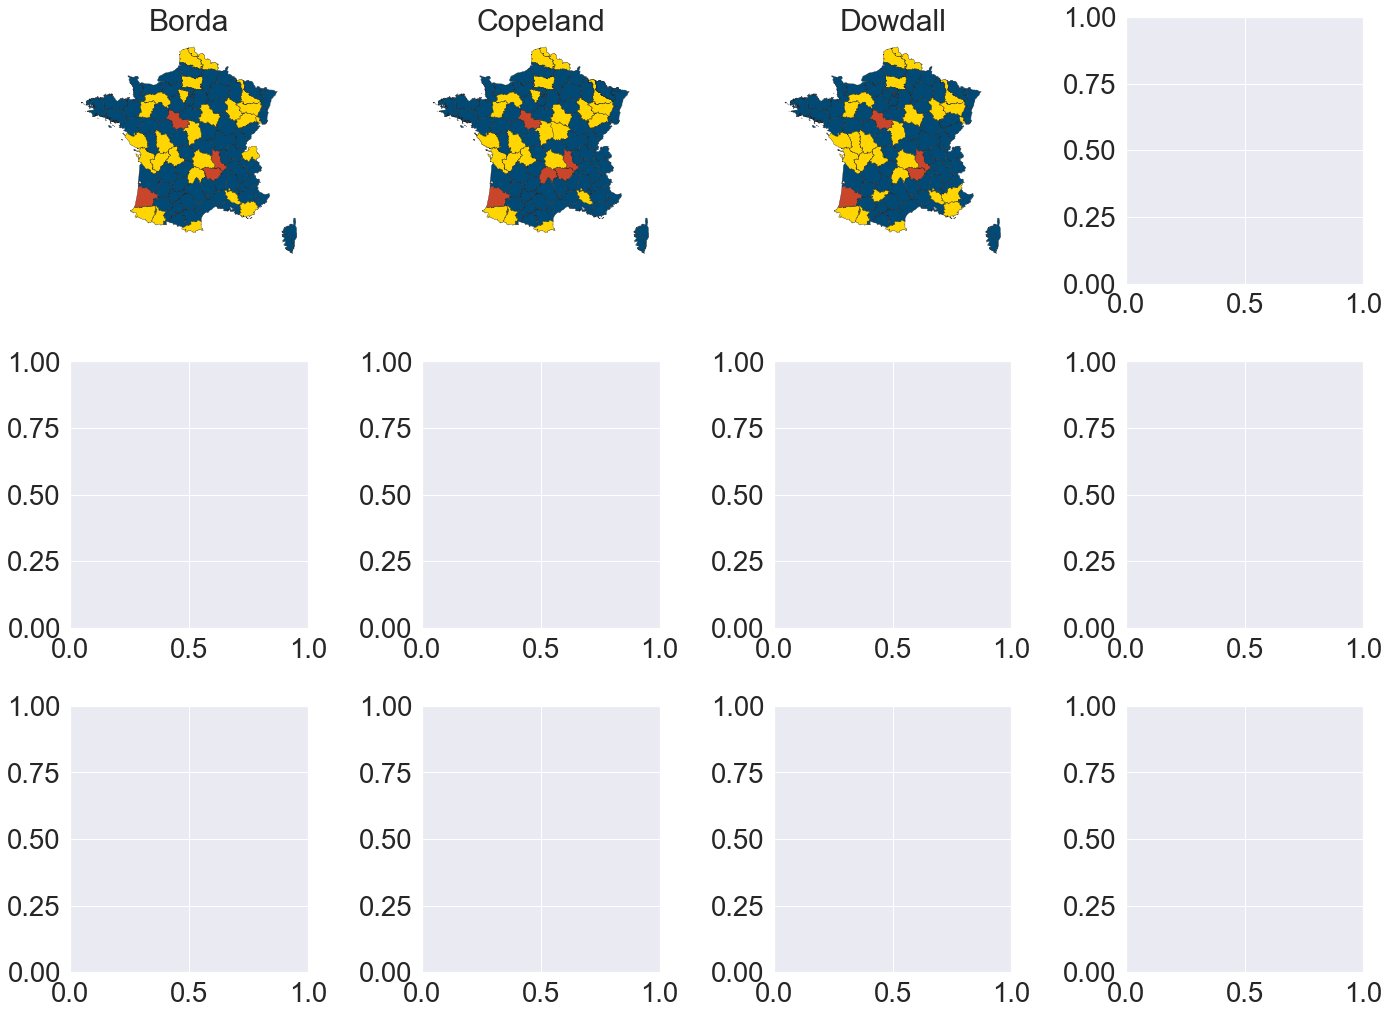

In [16]:
sns.set(font_scale=2.5)
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

i = 0
for method, tmp in data_dv.groupby("method"):
    x = i // 4
    y = i % 4
    ax = axs[x][y]
    tmp.plot(
        ax=ax, edgecolor="#222222", linewidth=0.3, color=tmp["color"], 
        column="candidate", legend=True,
        legend_kwds={"loc": "upper right", "bbox_to_anchor": (1, 0.5)})
    
    ax.axis("off")
    ax.set_title(method)
    
    i += 1
    
fig.tight_layout()

In [17]:
t = pd.DataFrame([("A", 1), ("B", 0)], columns=["candidate", "votes"])
t.groupby("candidate").agg({"votes": "sum"}).reindex(["A", "B", "C"]).fillna(0)

,votes
candidate,
A,1.0
B,0.0
C,0.0
